# Regression Project

### Project Title: Please Insert your Project Title Here
#### Done By: Name and Surname

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
import seaborn as sns
import matplotlib.cm as cm
import json
import pingouin as pg
import missingno as msno
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
 
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (15,10)

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [63]:
df = pd.read_csv('co2_emissions_from_agri.csv')

In [106]:
df = pd.read_csv('co2_emissions_from_agri.csv')

pd.set_option('display.max_columns', None)

df.head()
 

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [65]:
# Step 1 : Cleaning the data
# Display the first few rows of the dataset

print("First few rows of the dataset:")

print(df.head())

First few rows of the dataset:
          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [67]:
# Handle missing values

# Option 1: Drop rows with missing values

df_cleaned = df.dropna()
 
# Option 2: Fill missing values with a specific value (e.g., 0 or mean)

# df_cleaned = df.fillna(0)

# df_cleaned = df.fillna(df.mean())
 
# Convert data types if necessary (example: converting year to integer)

df_cleaned.loc[:, 'Year'] = df_cleaned['Year'].astype(int)
 
# Remove duplicates

df_cleaned = df_cleaned.drop_duplicates()
 
# Display the cleaned dataset

print("Cleaned dataset:")

print(df_cleaned.head())
 
# Step 2: Exploratory Data Analysis (EDA)
 
# Summary statistics

print("Summary statistics:")

print(df_cleaned.describe())

Cleaned dataset:
       Area  Year  Savanna fires  Forest fires  Crop Residues  \
31  Albania  1990         5.5561        7.0253        59.2391   
32  Albania  1991         5.5561        7.0253        31.4625   
33  Albania  1992         5.5561        7.0253        29.9373   
34  Albania  1993         5.5561        7.0253        44.0550   
35  Albania  1994         5.5561        7.0253        42.4253   

    Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
31           23.5200                     110.5705                       2.0   
32            6.2720                     110.5705                       2.0   
33            1.8816                     110.5705                       2.0   
34            1.0976                     110.5705                       2.0   
35            0.0000                     110.5705                       3.0   

    Food Transport  Forestland  ...  Manure Management  \
31         46.9645     72.8581  ...           474.6951   
3

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


# Histogram of a numerical column (e.g., emissions)

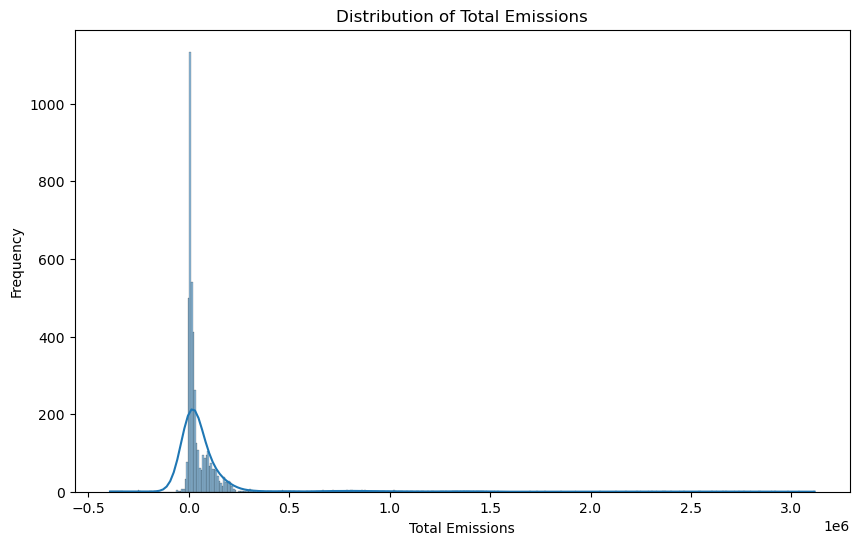

In [70]:
plt.figure(figsize=(10, 6))

sns.histplot(df_cleaned['total_emission'], kde=True)

plt.title('Distribution of Total Emissions')

plt.xlabel('Total Emissions')

plt.ylabel('Frequency')

plt.show()

# Boxplot of emissions by year

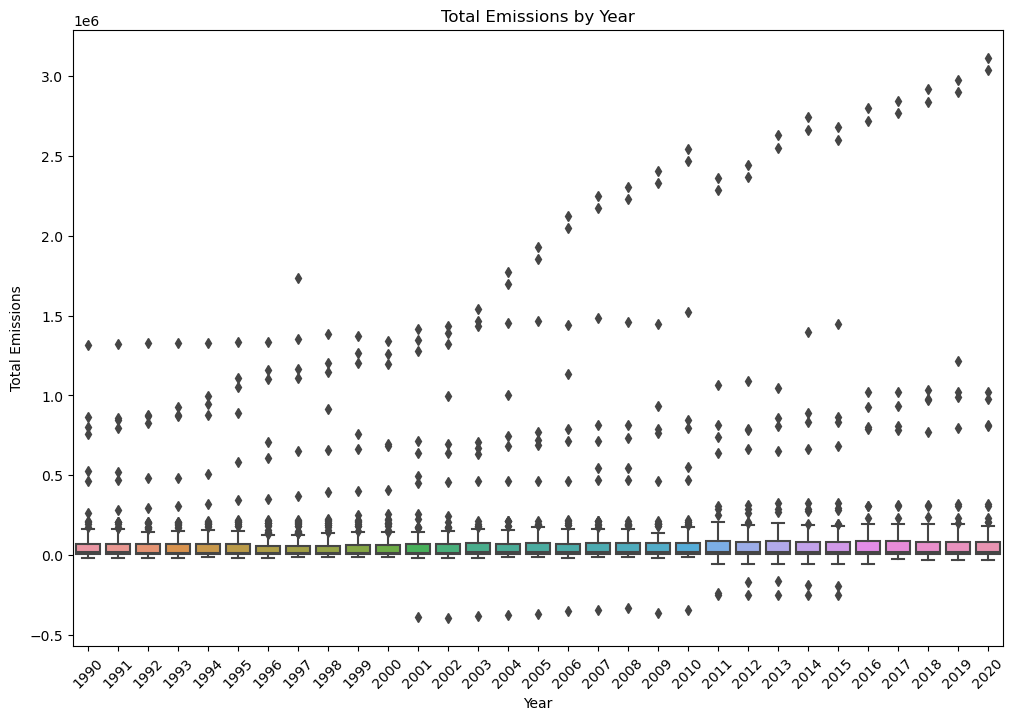

In [72]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='Year', y='total_emission', data=df_cleaned)

plt.title('Total Emissions by Year')

plt.xlabel('Year')

plt.ylabel('Total Emissions')

plt.xticks(rotation=45)

plt.show()

# Scatter plot of emissions vs. population

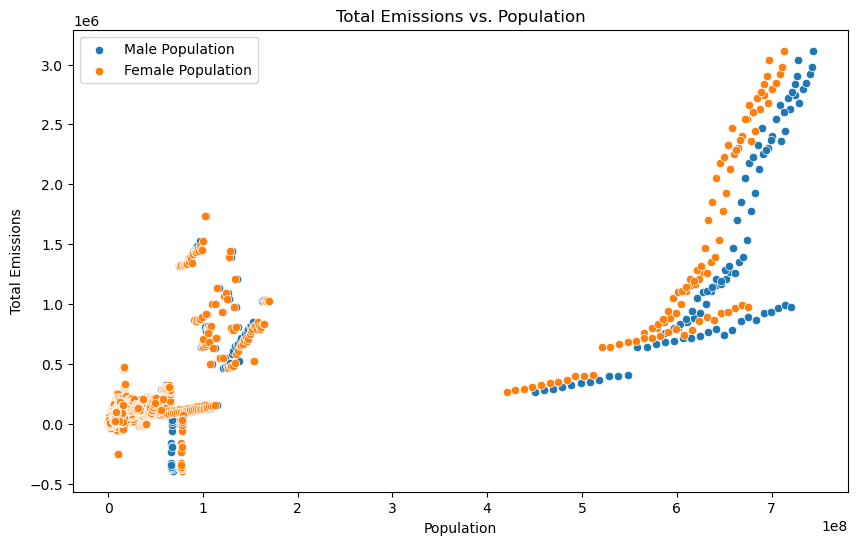

In [74]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Total Population - Male', y='total_emission', data=df_cleaned, label='Male Population')

sns.scatterplot(x='Total Population - Female', y='total_emission', data=df_cleaned, label='Female Population')

plt.title('Total Emissions vs. Population')

plt.xlabel('Population')

plt.ylabel('Total Emissions')

plt.legend()

plt.show()
 

# Correlation matrix

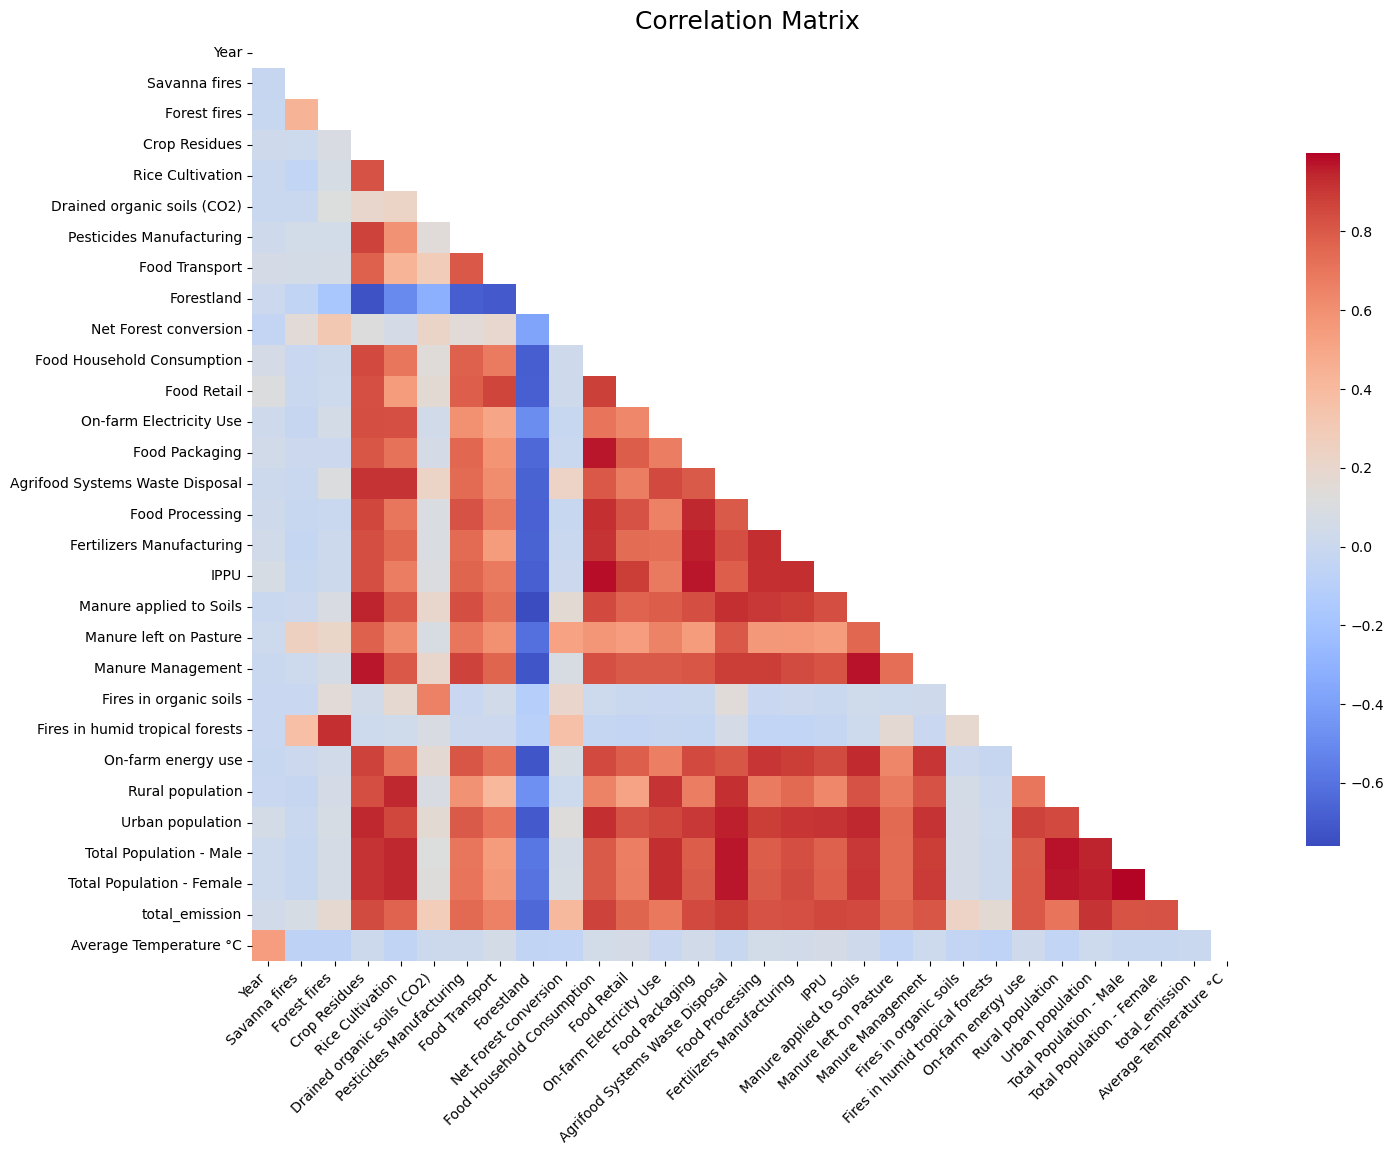

In [76]:
plt.figure(figsize=(16, 12))  # Increase figure size
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
correlation_matrix = df_cleaned[numeric_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, 
            annot_kws={"size": 8},  # Adjust font size for annotations
            cbar_kws={"shrink": 0.75})  # Adjust color bar size
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Correlation Matrix', fontsize=18)  # Adjust title font size
plt.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [78]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [80]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [82]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [84]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [86]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
